In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

max_rent_price = 1500
min_rent_price = 150
min_year = 1900

In [2]:
df = pd.read_excel("input.xlsx")
df.head()
df =df.drop([df[pd.isna(df["Kaina mėn.:"])].index][0])

## Cleaning target col

In [3]:
try:
    df['Kaina mėn.:'] = df['Kaina mėn.:'].str.replace(' €','')
    df['Kaina mėn.:'] = df['Kaina mėn.:'].str.replace(' ','')
    df['Kaina mėn.:'] = df['Kaina mėn.:'].astype(int)
    df = df[df['Kaina mėn.:']< max_rent_price]
    df = df[df['Kaina mėn.:']> min_rent_price]
except:
    print("Target col is converted")
df.rename(columns={"Kaina mėn.:": "rent_price"}, inplace=True)
df['rent_price'].describe()

count    1930.000000
mean      534.054404
std       238.407347
min       155.000000
25%       370.000000
50%       480.000000
75%       650.000000
max      1480.000000
Name: rent_price, dtype: float64

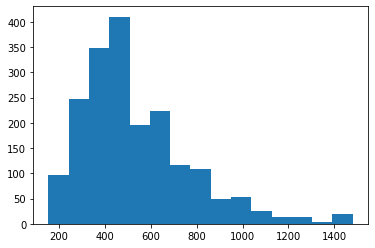

In [4]:
n_bins = 15
plt.hist(df[df["rent_price"] < max_rent_price]["rent_price"], bins=n_bins)
plt.show()

## Cleaning feature cols

In [5]:
df.rename(columns={"Aukštas:": "floor", "Aukštų sk.:": "total_floor_num",
                   "Kambarių sk.:":"room_num", "Metai:":"year_full",
                   "Plotas:":"area","Pastato tipas:":"House_type", 
                  "Šildymas:":"Heating"
                  }, inplace=True)
df.dtypes

df["year_full"].fillna(0, inplace = True)
# df["year"] = pd.to_numeric(df["year"],downcast='integer')

# df[cols] = df[cols].apply(pd.fillna,0, axis=1)
# df[cols] = df[cols].apply(pd.to_numeric, downcast='integer', errors='coerce', axis=1)

In [6]:
df.head()

,Adresas,floor,total_floor_num,Buto numeris:,rent_price,room_num,year_full,Namo numeris:,Nuoroda,House_type,Peržiūrėjo,area,Redaguotas,Įdėtas,Įrengimas:,Heating
1,https://www.aruodas.lt/butu-nuoma-vilniuje-pas...,3.0,9.0,NaN,450,2.0,2007,NaN,NaN,Mūrinis,NaN,64 m²,NaN,NaN,Įrengtas ...,Centrinis kolektorinis
2,https://www.aruodas.lt/butu-nuoma-vilniuje-zve...,4.0,4.0,NaN,699,2.0,2019,10,NaN,Mūrinis,NaN,"41,47 m²",NaN,NaN,NaN,"Centrinis, elektra"
3,https://www.aruodas.lt/butu-nuoma-vilniuje-sen...,3.0,3.0,NaN,800,3.0,1940,NaN,NaN,Mūrinis,NaN,71 m²,NaN,NaN,Įrengtas ...,Dujinis
4,https://www.aruodas.lt/butu-nuoma-vilniuje-zve...,2.0,3.0,NaN,400,2.0,1969,NaN,NaN,Mūrinis,NaN,"41,84 m²",NaN,NaN,Įrengtas ...,Centrinis
5,https://www.aruodas.lt/butu-nuoma-vilniuje-laz...,2.0,5.0,NaN,390,1.0,2008,NaN,NaN,Mūrinis,NaN,36 m²,NaN,NaN,Įrengtas ...,Centrinis kolektorinis


In [7]:
df[['year','year_renovation']] = df['year_full'].str.split(',',expand=True)
# cut year int
df['year'] = df['year_full'].str[:4]
df['year'].fillna(df["year_full"],inplace = True)
df["year"] = pd.to_numeric(df["year"],downcast='integer')
df['year_renovation'] = df['year_renovation'].str[:5]
df["year_renovation"] = pd.to_numeric(df["year_renovation"],downcast='integer')

df = df[df['year']> min_year]

In [8]:
try:
    df['area'] = df['area'].str.replace(' m²','')
    df['area'] = df['area'].str.replace(',','.')
except:
    print("Target col is converted")
df["area"] = pd.to_numeric(df["area"],downcast='float')

## New features

In [9]:
df["floors_from_top"] = df["total_floor_num"]- df["floor"]
df["top_floor"] = (df["total_floor_num"] == df["floor"]).astype('int')

In [10]:
districts = ["pasilaiciuose", "zveryne", "pilaiteje", "senamiestyje", 
             "naujamiestyje", "uzupyje", "snipiskese", "antakalnyje",
            "zirmunuose","lazdyneliuose", "karoliniskese", "naujojoje-vilnioje", "tarandeje","seskineje",
             "grigiskese", "santariskese", "balsiuose", "siaures-miestelyje",
             "markuciuose", "virsuliskese","fabijoniskese", "valakampiuose",
             "baltupiuose","justiniskese","visoriuose","lazdynuose","jeruzaleje"
             "verkiuose","avizieniuose","filaretuose","kalnenuose",
             "pavilnyje","bajoruose", "burbiskes","naujininkuose","vilkpedeje",
             "zemuosiuose-paneriuose","aukstuosiuose-paneriuose","jeruzaleje"
            ]

def map_district(district):    
    df.loc[df[df['Adresas'].str.contains(district).values].index,"district"] = district
    
for i in districts:
    map_district(i)

## Analysis

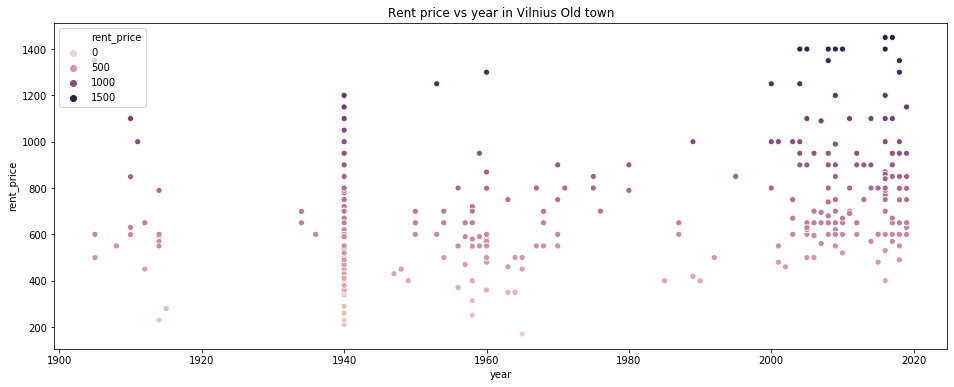

In [27]:
df["year"] = pd.to_numeric(df["year"],downcast='integer')

# ax = sns.scatterplot(x="year", y="rent_price", hue="area",                     
#                      data= df[df["district"]=="zveryne"]
#                     )

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="year", y="rent_price", hue ="rent_price",           
                     data= df[(df["district"]=="senamiestyje")]
                    ).set_title('Rent price vs year in Vilnius Old town')




## Export

In [12]:
# df.to_csv(".\output.csv",index=False)

In [13]:
# df_excluded_senamiestyje = df[df["district"]!="senamiestyje"]
# df_excluded_senamiestyje["district"].value_counts()

# df_excluded_senamiestyje.to_csv(".\output_excluded_senamiestyje.csv",index=False)